In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Upload data

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving imputed features_final.csv to imputed features_final.csv
Saving Optimal_target_with_92_교수님.csv to Optimal_target_with_92_교수님.csv
Saving Real_target_full_time.csv to Real_target_full_time.csv
Saving survival.csv to survival.csv


In [5]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['imputed features_final.csv'])) 
optimal_target = pd.read_csv(io.BytesIO(uploaded['Optimal_target_with_92_교수님.csv'])) 
real_target = pd.read_csv(io.BytesIO(uploaded['Real_target_full_time.csv'])) 
survival = pd.read_csv(io.BytesIO(uploaded['survival.csv'])) 

##Classification (Early / Medium / Late)

In [8]:
optimal_real_target = pd.merge(optimal_target, real_target, on = 'SubjectID')
optimal_real_target = optimal_real_target.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'] )
optimal_real_target1 = optimal_real_target.copy()
optimal_real_target1 = optimal_real_target1[(optimal_real_target1['status_opt']== 1) & (optimal_real_target1['status_real']==1 )]
optimal_real_target1['real_minus_opt_time'] = optimal_real_target1['time_real'] - optimal_real_target1['time_opt']
optimal_real_target1

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
2,533,287,1,287,1,0
3,649,425,1,487,1,62
5,1234,245,1,245,1,0
10,3551,501,1,501,1,0
19,4803,98,1,98,1,0
...,...,...,...,...,...,...
5325,995893,149,1,175,1,26
5327,996401,420,1,420,1,0
5330,996711,379,1,379,1,0
5340,998047,551,1,551,1,0


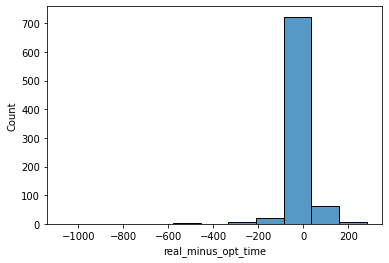

In [9]:
sns.histplot(x=optimal_real_target1['real_minus_opt_time'])

In [10]:
optimal_real_target1.describe()

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
count,823.000000,823.000000,823.0,823.000000,823.0,823.000000
mean,493137.889429,258.172539,1.0,252.065614,1.0,-6.106926
std,293940.833620,142.237591,0.0,139.290086,0.0,75.715184
min,533.000000,10.000000,1.0,2.000000,1.0,-1071.000000
25%,237508.000000,148.500000,1.0,134.500000,1.0,0.000000
50%,486387.000000,245.000000,1.0,245.000000,1.0,0.000000
75%,755398.500000,353.000000,1.0,348.000000,1.0,0.000000
max,998894.000000,1073.000000,1.0,621.000000,1.0,281.000000


In [11]:
optimal_real_target1['real_minus_opt_time'].value_counts()

 0      647
 63       9
 28       8
-63       7
-28       6
       ... 
-187      1
-189      1
-190      1
-51       1
-99       1
Name: real_minus_opt_time, Length: 113, dtype: int64

In [12]:
subject_early = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] < 0]
subject_medium = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] == 0]
subject_late = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] > 0]
early_list = list(subject_early['SubjectID'])
medium_list = list(subject_medium['SubjectID'])
late_list = list(subject_late['SubjectID'])
print(len(early_list))
print(len(medium_list))
print(len(late_list))

83
647
93


In [13]:
optimal_real_target2 = optimal_real_target[(optimal_real_target['status_opt'] == 1) & (optimal_real_target['status_real'] == 0)]
add_late_list = list(optimal_real_target2['SubjectID'])

optimal_real_target3 = optimal_real_target[(optimal_real_target['status_opt'] == 0) & (optimal_real_target['status_real'] == 1)]
add_early_list = list(optimal_real_target3['SubjectID'])

print(len(add_late_list))
print(len(add_early_list))

89
77


In [14]:
validate_add_late = optimal_real_target2[['SubjectID','time_opt', 'time_real']]
validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_real'] - validate_add_late['time_opt']
validate_add_late = validate_add_late[validate_add_late['real(0)-optimal(1)']<0]
validate_add_late

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,real(0)-optimal(1)


In [15]:
validate_add_early = optimal_real_target3[['SubjectID','time_opt', 'time_real']]
validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_opt'] - validate_add_early['time_real']
validate_add_early = validate_add_early[validate_add_early['optimal(0)-real(1)']<0]
validate_add_early

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,optimal(0)-real(1)


In [16]:
early_list_fin = early_list + add_early_list
medium_list_fin = medium_list
late_list_fin = early_list + add_late_list
print(len(early_list_fin))
print(len(medium_list_fin))
print(len(late_list_fin))

160
647
172


In [17]:
!pip install lifelines

     |████████████████████████████████| 348kB 30.2MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=f1439241e3976a28101c7f0b0de96c592d29cd1c151ce2fe7f311ec20c2d6f97
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


##Kaplan Meier - Comparing early and late

In [18]:
from lifelines import KaplanMeierFitter

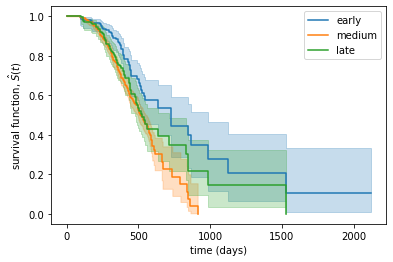

In [19]:
surv_early = survival.copy()
surv_medium = survival.copy()
surv_late = survival.copy()

surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list_fin), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [20]:
from lifelines.statistics import logrank_test
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.022154944597069796

## Cox regression - effect of delayed gastrostomy

###Preprocessing data

In [21]:
feature_surv = pd.merge(feature, survival, on = 'SubjectID')
feature_surv = feature_surv.drop(columns='Unnamed: 0')
feature_surv

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.900000,3.000000,2.600000,2.000000,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.418109,97.421687,30.250000,4.000000,4.000000,4.000000,3.500000,2.000000,2.250000,3.500000,2.000000,1.000000,4.000000,8.000000,14.250000,-0.016393,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0
2,533.0,65.0,0.0,-44.0,-1023.0,1.0,979.0,-0.583333,73.500000,28.666667,1.000000,1.333333,2.000000,4.000000,4.000000,3.333333,4.000000,3.333333,2.666667,3.000000,3.000000,21.333333,-0.010989,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,378,0
3,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.750000,3.166667,4.000000,4.000000,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,250,1
4,902.0,77.0,0.0,-49.0,-514.0,0.0,465.0,-0.041707,89.600000,32.250000,4.000000,3.750000,3.250000,4.000000,4.000000,2.750000,4.000000,2.500000,1.000000,3.000000,7.250000,18.250000,-0.035714,0.000000,0.000000,0.011905,0.000000,0.000000,-0.023810,0.023810,-0.011905,0.000000,-0.011905,0.011905,-0.035714,154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,999761.0,62.0,1.0,-201.0,-717.0,0.0,516.0,-0.276491,70.168332,28.728766,3.269068,3.204172,3.363836,2.913782,2.626244,2.396330,2.952348,2.611772,1.842263,3.593018,6.628258,15.378400,-0.065272,0.023548,-0.045048,0.046242,-0.034908,-0.036826,-0.023184,0.007134,0.003107,0.002035,0.033081,0.069433,-0.123884,707,0
4042,999823.0,55.0,1.0,-84.0,-492.0,0.0,408.0,-0.025981,100.800000,35.250000,2.750000,3.000000,2.750000,4.000000,3.750000,3.000000,4.000000,4.000000,4.000000,4.000000,5.500000,22.750000,-0.024390,-0.012195,0.000000,-0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,-0.024390,0.000000,184,0
4043,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.000000,0.400000,2.800000,2.000000,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266,0
4044,999929.0,56.0,1.0,-107.0,-411.0,0.0,304.0,0.288855,65.740601,28.811225,3.057780,3.227749,3.522808,2.987901,2.562066,2.399382,2.975168,2.625112,1.833925,3.589713,6.587373,15.357077,-0.019082,-0.004429,-0.003651,-0.000554,0.002776,-0.008762,0.007679,-0.023168,-0.006188,-0.015027,-0.004572,-0.005919,-0.004478,168,0


In [22]:
feature_surv_early = feature_surv.copy()
feature_surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
feature_surv_early['delayed_gas'] = 0 
feature_surv_early

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
24,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.50,4.00,4.0,4.00,3.000000,3.000000,2.000000,3.500000,2.50,2.00,3.50,8.00,16.00,-0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,-0.016949,0.000000,-0.016949,0.000000,0.000000,385,0,0
27,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.50,2.75,3.0,3.25,0.750000,0.500000,0.000000,2.250000,2.00,0.00,4.00,6.00,5.50,-0.024691,0.000000,0.000000,0.000000,-0.012346,-0.012346,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,-0.024691,416,0,0
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.25,3.25,4.0,3.00,3.250000,1.500000,2.000000,2.250000,2.25,1.50,3.25,6.25,12.75,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,0
102,23939.0,56.0,0.0,-327.0,-653.0,0.0,326.0,0.077446,110.308090,27.25,3.75,4.0,4.00,3.000000,1.250000,2.250000,3.000000,2.00,0.00,4.00,7.75,11.50,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,-0.012821,0.012821,0.000000,0.000000,0.000000,0.012821,-0.012821,390,1,0
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.25,3.50,4.0,4.00,2.750000,1.500000,1.500000,1.750000,2.00,2.25,4.00,7.50,11.75,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,960100.0,47.0,1.0,-37.0,-237.0,1.0,200.0,0.064925,103.333333,31.50,3.00,3.5,3.00,4.000000,4.000000,2.500000,4.000000,2.50,1.00,4.00,6.00,18.00,-0.050000,0.000000,-0.016667,0.000000,0.000000,0.000000,-0.016667,0.033333,-0.016667,0.000000,0.000000,0.000000,-0.033333,361,0,0
3890,965731.0,57.0,1.0,-56.0,-264.0,0.0,208.0,-0.322034,66.500000,24.50,4.00,4.0,4.00,2.500000,2.500000,1.500000,1.000000,1.50,0.00,3.50,8.00,9.00,-0.118644,0.000000,0.000000,0.000000,-0.016949,-0.016949,-0.016949,-0.016949,-0.016949,0.000000,-0.016949,0.000000,-0.101695,356,1,0
3954,979984.0,52.0,1.0,-314.0,-331.0,0.0,17.0,-0.278029,43.000000,19.60,1.00,2.0,1.10,2.700000,1.400000,1.400000,2.600000,3.00,1.40,2.80,2.10,12.50,-0.093023,-0.011628,0.000000,-0.023256,0.011628,0.000000,-0.023256,0.023256,0.000000,-0.023256,-0.011628,-0.034884,-0.046512,170,1,0
3961,981681.0,54.0,0.0,-435.0,-496.0,0.0,61.0,0.078798,77.000000,25.00,3.00,3.0,3.00,1.333333,2.333333,2.666667,2.666667,2.00,1.00,4.00,6.00,12.00,0.000000,0.000000,0.000000,0.000000,0.037736,-0.018868,-0.018868,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,730,1,0


In [23]:
feature_surv_late = feature_surv.copy()
feature_surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)
feature_surv_late['delayed_gas'] = 1
feature_surv_late

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.250000,3.250000,4.000000,3.000000,3.250000,1.500000,2.000000,2.250000,2.250000,1.500000,3.25,6.250000,12.750000,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,1
62,14836.0,59.0,1.0,-113.0,-297.0,0.0,184.0,-0.131329,77.666667,34.500000,4.000000,3.500000,4.000000,3.000000,3.000000,4.000000,4.000000,3.500000,2.500000,3.00,8.000000,20.000000,-0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035714,-0.035714,0.000000,0.000000,-0.071429,391,0,1
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.250000,3.500000,4.000000,4.000000,2.750000,1.500000,1.500000,1.750000,2.000000,2.250000,4.00,7.500000,11.750000,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,1
112,26082.0,52.0,0.0,-239.0,-331.0,0.0,92.0,-0.257285,59.250000,32.400000,3.800000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,0.600000,4.00,7.800000,16.600000,-0.027778,-0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013889,0.000000,-0.013889,-0.013889,114,1,1
148,34264.0,73.0,0.0,-76.0,-203.0,1.0,127.0,-0.010922,65.250000,26.666667,1.666667,2.000000,1.666667,2.666667,3.333333,3.000000,3.666667,3.333333,2.333333,3.00,3.333333,18.333333,-0.145455,-0.018182,0.000000,-0.018182,0.000000,-0.018182,-0.036364,0.018182,-0.018182,-0.018182,0.000000,-0.036364,-0.109091,93,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,972247.0,68.0,0.0,-469.0,-605.0,0.0,136.0,-0.169939,59.000000,21.100000,3.000000,2.700000,2.500000,3.000000,1.800000,1.600000,1.500000,2.000000,0.000000,3.00,5.500000,9.900000,-0.031746,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,-0.015873,-0.031746,125,1,1
3931,974189.0,66.0,0.0,-50.0,-141.0,1.0,91.0,-0.321850,70.200000,29.000000,2.000000,2.750000,2.750000,2.750000,2.750000,2.750000,3.000000,3.750000,3.750000,2.75,4.750000,18.750000,-0.130952,0.000000,-0.023810,-0.011905,-0.011905,-0.011905,-0.011905,0.000000,-0.011905,-0.011905,-0.011905,-0.011905,-0.083333,286,0,1
3953,979982.0,78.0,0.0,-55.0,-406.0,1.0,351.0,-0.480208,54.675031,39.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,7.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,430,0,1
3954,979984.0,52.0,1.0,-314.0,-331.0,0.0,17.0,-0.278029,43.000000,19.600000,1.000000,2.000000,1.100000,2.700000,1.400000,1.400000,2.600000,3.000000,1.400000,2.80,2.100000,12.500000,-0.093023,-0.011628,0.000000,-0.023256,0.011628,0.000000,-0.023256,0.023256,0.000000,-0.023256,-0.011628,-0.034884,-0.046512,170,1,1


In [24]:
X = pd.concat([feature_surv_early, feature_surv_late])
X

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
24,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.500000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.500000,2.50,2.000000,3.50,8.00,16.000000,-0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,-0.016949,0.000000,-0.016949,0.000000,0.000000,385,0,0
27,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.500000,2.750000,3.000000,3.250000,0.750000,0.500000,0.000000,2.250000,2.00,0.000000,4.00,6.00,5.500000,-0.024691,0.000000,0.000000,0.000000,-0.012346,-0.012346,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,-0.024691,416,0,0
48,12808.0,55.0,0.0,-59.0,-245.0,0.0,186.0,-0.071749,92.333333,26.250000,3.250000,4.000000,3.000000,3.250000,1.500000,2.000000,2.250000,2.25,1.500000,3.25,6.25,12.750000,-0.122222,-0.011111,0.000000,-0.022222,-0.011111,-0.022222,-0.022222,0.000000,-0.011111,-0.011111,0.011111,-0.033333,-0.100000,396,0,0
102,23939.0,56.0,0.0,-327.0,-653.0,0.0,326.0,0.077446,110.308090,27.250000,3.750000,4.000000,4.000000,3.000000,1.250000,2.250000,3.000000,2.00,0.000000,4.00,7.75,11.500000,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,-0.012821,0.012821,0.000000,0.000000,0.000000,0.012821,-0.012821,390,1,0
106,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.250000,3.500000,4.000000,4.000000,2.750000,1.500000,1.500000,1.750000,2.00,2.250000,4.00,7.50,11.750000,-0.054795,-0.013699,0.000000,0.000000,-0.013699,-0.013699,-0.013699,0.000000,0.000000,0.013699,0.000000,-0.013699,-0.041096,470,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,972247.0,68.0,0.0,-469.0,-605.0,0.0,136.0,-0.169939,59.000000,21.100000,3.000000,2.700000,2.500000,3.000000,1.800000,1.600000,1.500000,2.00,0.000000,3.00,5.50,9.900000,-0.031746,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,-0.015873,-0.031746,125,1,1
3931,974189.0,66.0,0.0,-50.0,-141.0,1.0,91.0,-0.321850,70.200000,29.000000,2.000000,2.750000,2.750000,2.750000,2.750000,2.750000,3.000000,3.75,3.750000,2.75,4.75,18.750000,-0.130952,0.000000,-0.023810,-0.011905,-0.011905,-0.011905,-0.011905,0.000000,-0.011905,-0.011905,-0.011905,-0.011905,-0.083333,286,0,1
3953,979982.0,78.0,0.0,-55.0,-406.0,1.0,351.0,-0.480208,54.675031,39.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.00,7.00,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,430,0,1
3954,979984.0,52.0,1.0,-314.0,-331.0,0.0,17.0,-0.278029,43.000000,19.600000,1.000000,2.000000,1.100000,2.700000,1.400000,1.400000,2.600000,3.00,1.400000,2.80,2.10,12.500000,-0.093023,-0.011628,0.000000,-0.023256,0.011628,0.000000,-0.023256,0.023256,0.000000,-0.023256,-0.011628,-0.034884,-0.046512,170,1,1


In [25]:
X = X[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory','delayed_gas','time_event','status']]

In [26]:
from lifelines import CoxPHFitter

In [27]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(X, 'time_event', event_col='status')
cph.print_summary()

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q8_Walking'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 247 total observations, 165 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 247
number of events observed = 82
   partial log-likelihood = -316.62
         time fit was run = 2021-05-22 01:39:57 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.06       1.06       0.01             0.03             0.08                 1.04                 1.08
Gender                         -0.31       0.73       0.27            -0.84             0.21                 0.43                 1.23
onset_site                     -0.22       0.80       0.41            -1.03             0.58                 0.36                 1.78
onset_delta                     0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diag_minus_onset               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -7.22       0.00       5.98           -18.93             4.50                 0.00                89.91
fvc_slope                       0.01       1.01       0.49            -0.96             0.98                 0.38                 2.67
fvc_mean                       -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
mean_Q10_Respiratory           -0.07       0.93       0.23            -0.52             0.37                 0.60                 1.45
mean_Bulbar                     0.25       1.28       0.11             0.03             0.46                 1.03                 1.58
mean_motor                     -0.07       0.94       0.03            -0.12            -0.01                 0.89                 0.99
slope_Q1_Speech                 1.48       4.40      11.48           -21.01            23.98                 0.00             2.59e+10
slope_Q2_Salivation            17.97   6.38e+07      12.42            -6.37            42.31                 0.00             2.38e+18
slope_Q3_Swallowing           -10.50       0.00       9.39           -28.91             7.91                 0.00              2720.26
slope_Q4_Handwriting           17.05   2.54e+07      10.78            -4.08            38.18                 0.02             3.82e+16
slope_Q5_Cutting                4.64     103.93      10.33           -15.60            24.88                 0.00             6.42e+10
slope_Q6_Dressing_and_Hygiene -21.22       0.00      11.84           -44.42             1.98                 0.00                 7.27
slope_Q7_Turning_in_Bed         8.55    5187.35       5.84            -2.90            20.00                 0.06             4.87e+08
slope_Q8_Walking               -0.11       0.90      14.42           -28.37            28.16                 0.00             1.69e+12
slope_Q9_Climbing_Stairs       -0.51       0.60       9.75           -19.62            18.60                 0.00             1.19e+08
slope_Q10_Respiratory          13.45   6.94e+05      10.72            -7.57            34.47                 0.00             9.32e+14
delayed_gas                     0.25       1.28       0.24            -0.21             0.71                 0.81                 2.04

                                  z      p   -log2(p)
covariate                                            
Age                            4.85 <0.005      19.62
Gender                        -1.17   0.24       2.05
onset_site                    -0.55   0.58       0.78
onset_delta                    1.75   0.08       3.65
diag_mi

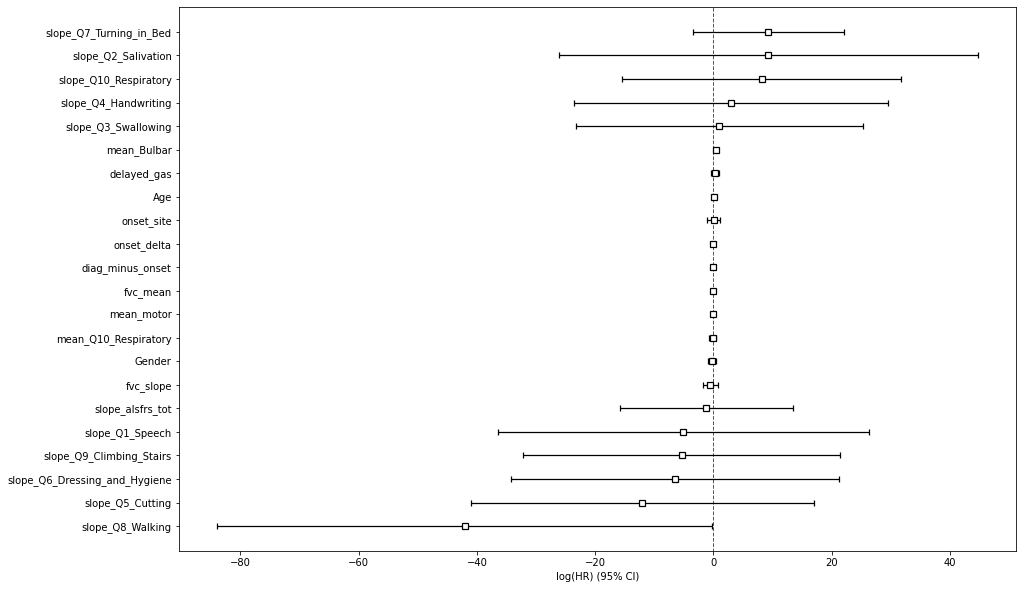

In [ ]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함